In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!unzip /content/drive/MyDrive/intern.zip

Archive:  /content/drive/MyDrive/intern.zip
  inflating: intern/Fraud.csv        


In [3]:
df = pd.read_csv('/content/intern/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [42]:
df.shape

(6362620, 11)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
print(df.isFraud.value_counts())
(df.isFraud.value_counts()/df.shape[0])*100

isFraud
0    6354407
1       8213
Name: count, dtype: int64


,count
isFraud,
0,99.870918
1,0.129082


In [45]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


The least transaction amout is 0/- and the highest transaction amount is ~9 crore.

## **Exploatory Data Analysis**

In [4]:
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_cols = ['type']

### **Univariate Analysis**

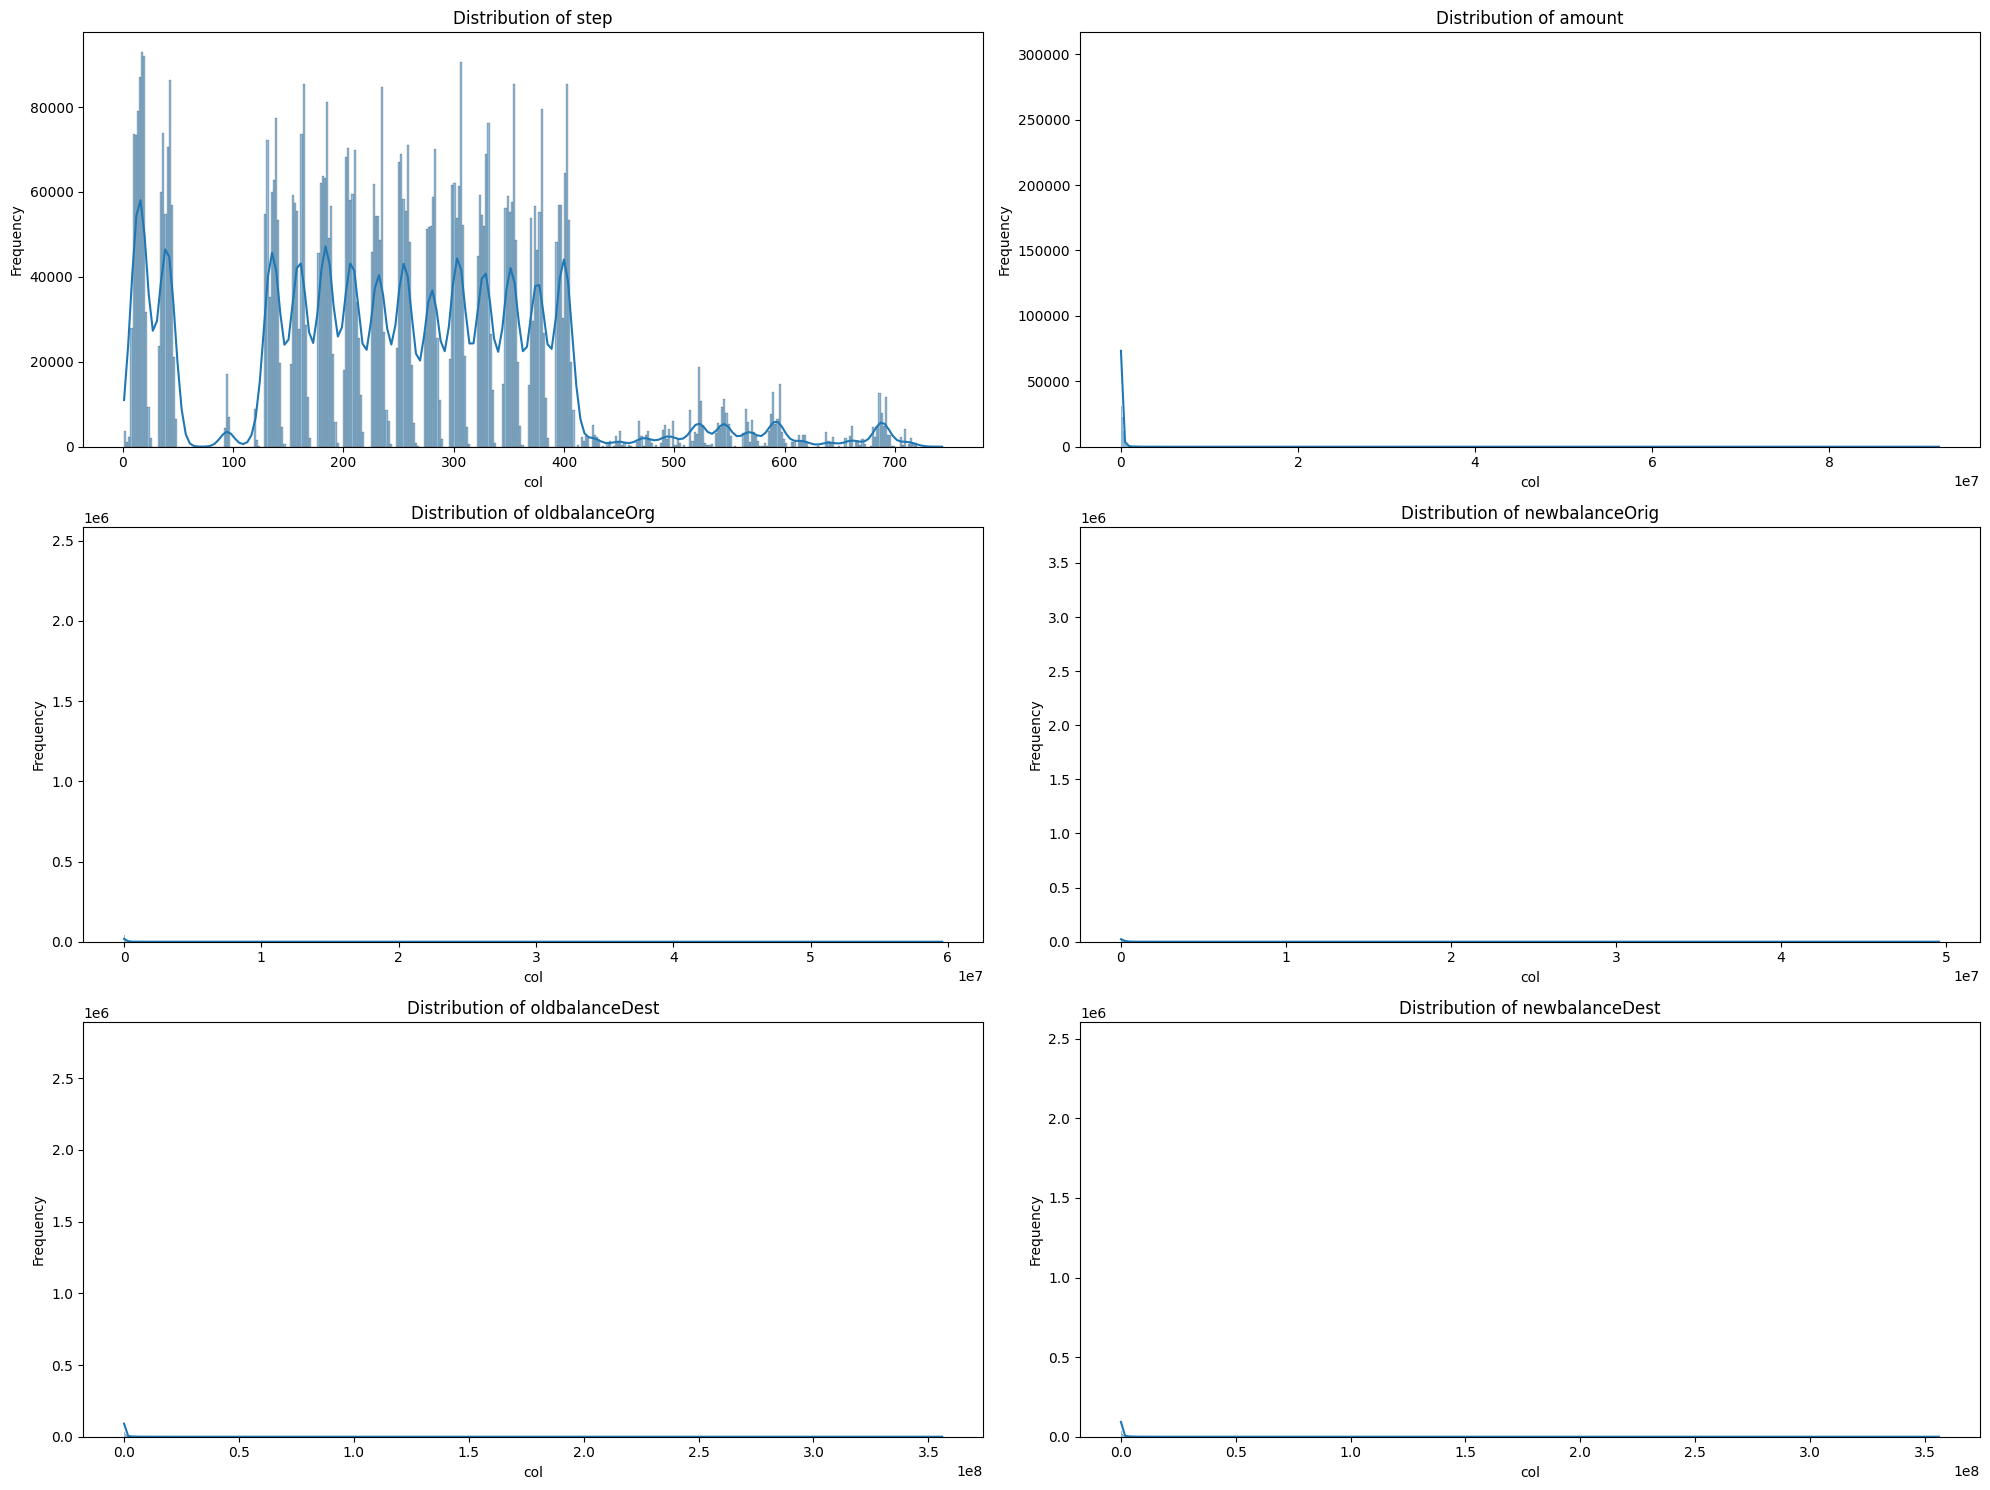

In [49]:
fig, axes = plt.subplots(3,2, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

`step` : Represents the transaction time step (in hours). Distribution is uniform across time, suggesting transactions are spread evenly — no specific fraud-prone hours detected from univariate view.

/tmp/ipython-input-1616731850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette = ['green','red'])


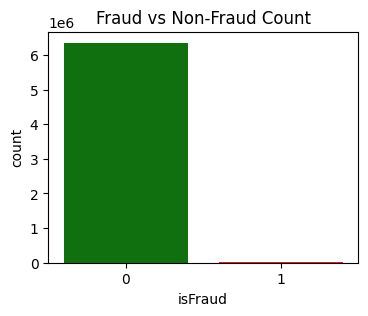

In [62]:
plt.figure(figsize=(4,3))
sns.countplot(x='isFraud', data=df, palette = ['green','red'])
plt.title('Fraud vs Non-Fraud Count')
plt.show()

/tmp/ipython-input-417855433.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFlaggedFraud', data=df, palette=['salmon', 'red'])


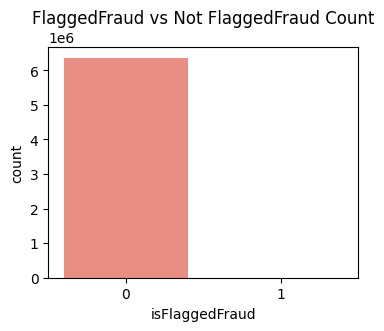

In [61]:
plt.figure(figsize=(4,3))
sns.countplot(x='isFlaggedFraud', data=df, palette=['salmon', 'red'])
plt.title('FlaggedFraud vs Not FlaggedFraud Count')
plt.show()

`isFraud` and `isFlagedFraud` : Both are Highly imbalanced (e.g., 0: 99%, 1: 1%) — requires special handling (SMOTE, class weighting) in modeling.

/tmp/ipython-input-4262944390.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


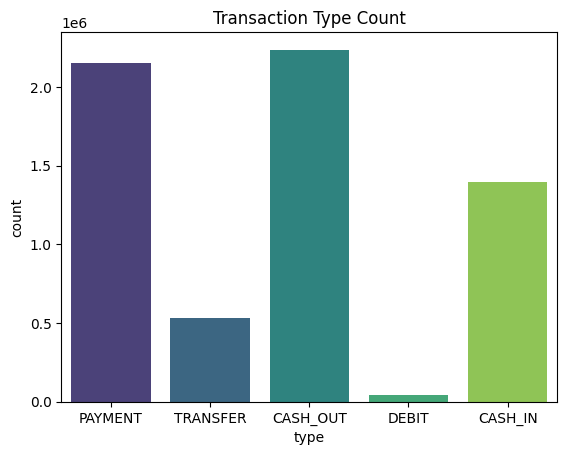

In [59]:
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Transaction Type Count')
plt.show()

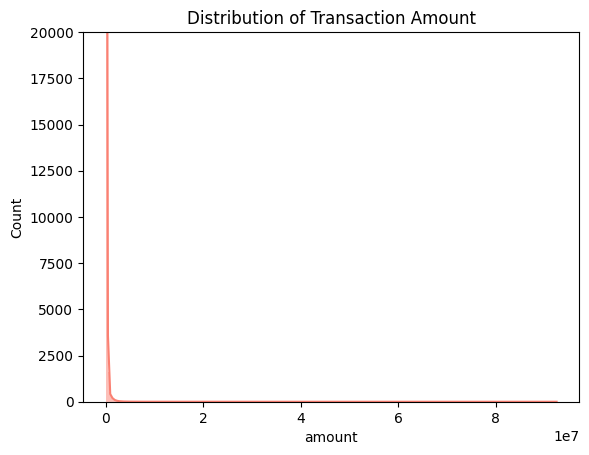

In [66]:
sns.histplot(data=df, x='amount', kde=True, color='salmon')
plt.title('Distribution of Transaction Amount')
plt.ylim(0,20000)
plt.show()

`amount` : Highly right-skewed; most transactions are low value, but there are extreme outliers with very high amounts — potential high-risk transactions.

The rest of the balances feaure all are a little right skewed and spread for outliers some usual reasons.

### **Bivariate Analysis**

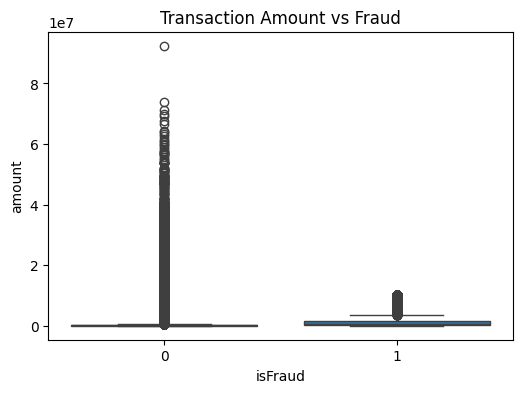

In [68]:
plt.figure(figsize=(6,4))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount vs Fraud')
plt.show()

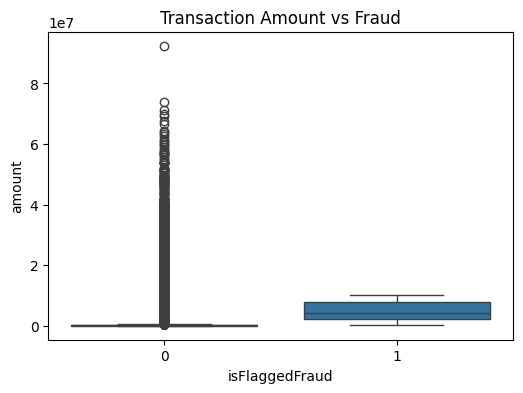

In [69]:
plt.figure(figsize=(6,4))
sns.boxplot(x='isFlaggedFraud', y='amount', data=df)
plt.title('Transaction Amount vs Fraud')
plt.show()

Fraudsters often target higher-value transactions because the gain is bigger. Yet, here the majority of both fraud and non-fraud transactions are clustered at lower amounts.

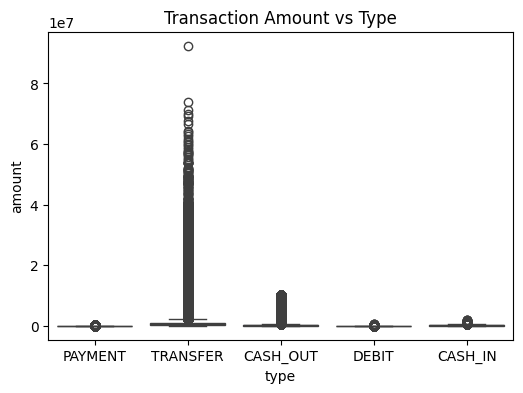

In [70]:
plt.figure(figsize=(6,4))
sns.boxplot(x='type', y='amount', data=df)
plt.title('Transaction Amount vs Type')
plt.show()

`TRANSFER`

- Has the largest transaction amounts, including extreme outliers reaching above 80 million.

- This makes sense because bank transfers often involve moving large sums between accounts.

`CASH_OUT`

- Also shows relatively high transaction amounts (though less than TRANSFER).

`PAYMENT`, `DEBIT`, `CASH_IN`

- Generally involve much smaller amounts.

- Payments (bill pay, purchases) are low compared to transfers and cash-outs.

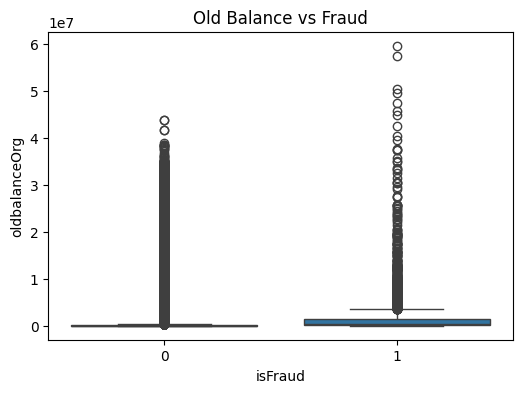

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=df)
plt.title('Old Balance vs Fraud')
plt.show()

Fraudsters might focus on accounts with large balances because the potential gain is higher.

## **Check for Outliers**

In [31]:
df[(df['oldbalanceOrg'] == 0) & (df['amount'] > 0)].sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3929515,285,TRANSFER,937592.68,C2059317824,0.0,0.0,C1686124955,1926116.50,2863709.18,0,0
4096792,301,CASH_OUT,396527.44,C279137805,0.0,0.0,C522949895,1240589.09,1637116.53,0,0
2992966,232,CASH_OUT,177704.97,C1545012778,0.0,0.0,C866422217,306642.25,484347.21,0,0
2337391,189,CASH_OUT,3859.65,C1421985621,0.0,0.0,C1458610604,988997.02,992856.67,0,0
2387896,201,PAYMENT,4383.89,C1692554471,0.0,0.0,M1663603194,0.00,0.00,0,0


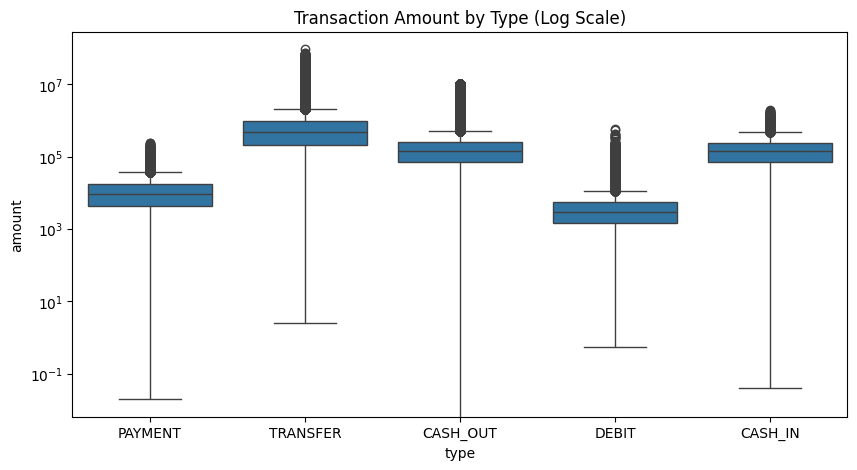

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x='type', y='amount', data=df)
plt.yscale('log')
plt.title("Transaction Amount by Type (Log Scale)")
plt.show()

1. PAYMENT

- Most transactions are between a few hundred to a few thousand.

- Some extreme cases reach above ₹100,000+, but fewer compared to transfers.

2. TRANSFER & CASH_OUT

- Very high transaction amounts — in some cases 10 million+.

- These are important to keep, because large transfers are often fraudulent.

3. DEBIT

- Mostly low-to-mid amounts, but has spikes.

4. CASH_IN

- Similar to CASH_OUT in range, but slightly lower extremes.

In [11]:
# In normal ML tasks, we might cap or remove outliers.

# Here, we should NOT remove high-value transactions — they might be fraud signals.

# Instead of deleting, transform the data (log scaling, normalization) to make model training stable.

In [32]:
df[(df['oldbalanceOrg'] == 0) & (df['amount'] > 0)]['type'].value_counts()

,count
type,
CASH_OUT,1025783
PAYMENT,774245
TRANSFER,282783
CASH_IN,13464
DEBIT,6158


## **Checking Multicollinearity by Variance Inflation Factor and Heatmap**

In [5]:
df['flag_balance_mismatch'] = ((df['oldbalanceOrg'] == 0) & (df['amount'] > 0)).astype(int)
df['amount_gt_old'] = (df['amount'] > df['oldbalanceOrg']).astype(int)

A key pattern (may be fraud or or anomalies) has been recoreded where the transaction (mostly Cash-out) amout is positive, yet the sender's balance is zero.

I created a binary feature flag_balance_mismatch to capture this behavior.

In [ ]:
# Fraudsters might use zero-balance accounts to mask their identity or exploit system loopholes.

In [34]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

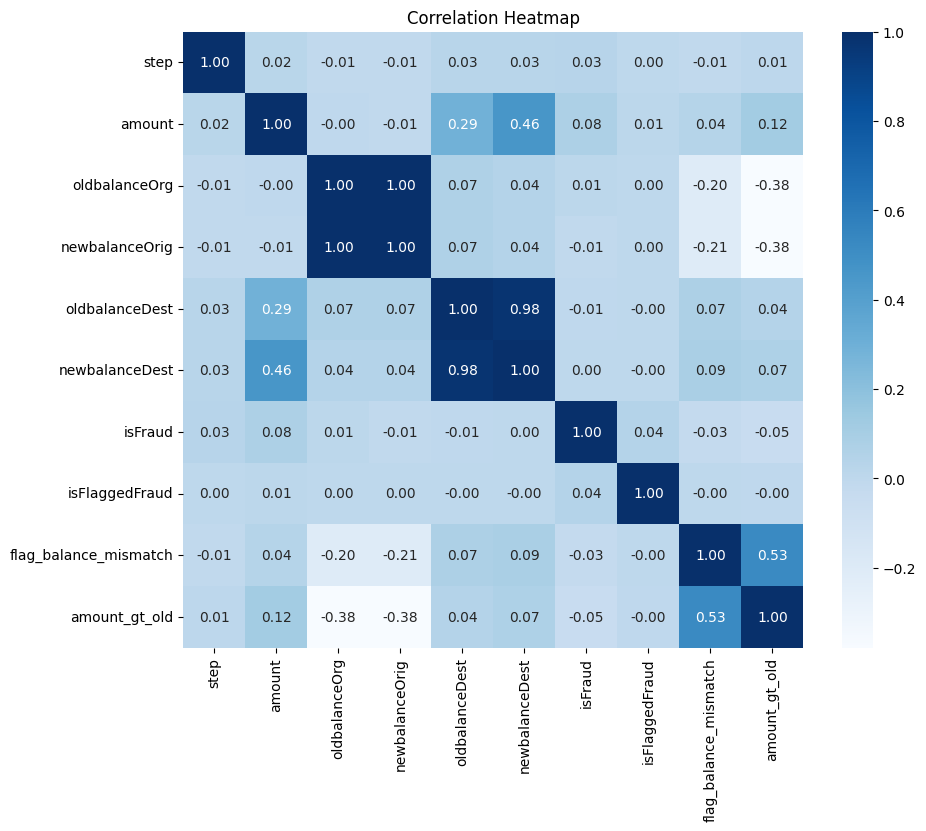

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot = True, cmap= 'Blues', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i)
                   for i in range(len(numeric_df.columns))]
vif_data

,feature,VIF
0,step,2.192305
1,amount,4.132718
2,oldbalanceOrg,545.888761
3,newbalanceOrig,548.011279
4,oldbalanceDest,73.079488
5,newbalanceDest,84.889298
6,isFraud,1.191294
7,isFlaggedFraud,1.002555
8,flag_balance_mismatch,2.093422
9,amount_gt_old,3.211366


newbalanceOrig ~ (oldbalanceOrg - amount)

newbalanceDest ~ (oldbalanceDest + amount)

These are derived from each other, so they carry redundant information and highly correlated.

VIF is too much bigger than the usual vif-limit 10 here.

## **Feature Engineering**

In [24]:
df_eng = df.copy()

### **Remove Mulcollinearity**

Let's go with the first approach (dropping one column from each highly correlated pair)

In [25]:
df_eng.drop(['newbalanceOrig','newbalanceDest'],axis=1, inplace=True)
num_eng = df_eng.select_dtypes(include=['float64', 'int64'])
vif = pd.DataFrame()
vif["feature"] = num_eng.columns
vif["VIF"] = [variance_inflation_factor(num_eng.values, i)
                   for i in range(len(num_eng.columns))]
vif

,feature,VIF
0,step,2.171221
1,amount,1.220159
2,oldbalanceOrg,1.130628
3,oldbalanceDest,1.222341
4,isFraud,1.013980
5,isFlaggedFraud,1.002052
6,flag_balance_mismatch,2.077122
7,amount_gt_old,3.200973


Now it is the second approch which involves creating the deltaOrig and deltaDest features and then dropping the original four balance columns.

In [26]:
num_data = df.select_dtypes(include=['float64', 'int64'])
num_data['deltaOrig'] = num_data['oldbalanceOrg'] - num_data['newbalanceOrig']
num_data['deltaDest'] = num_data['newbalanceDest'] - num_data['oldbalanceDest']
num_data.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1, inplace=True)
vif = pd.DataFrame()
vif["feature"] = num_data.columns
vif["VIF"] = [variance_inflation_factor(num_data.values, i)
                   for i in range(len(num_data.columns))]
vif

,feature,VIF
0,step,2.012617
1,amount,3.917488
2,isFraud,1.185489
3,isFlaggedFraud,1.002518
4,flag_balance_mismatch,2.078886
5,amount_gt_old,3.086764
6,deltaOrig,1.226383
7,deltaDest,3.769720


In my first approch, I am keeping oldbalanceOrg and oldbalanceDest, which might still have some hidden correlation with other variables.

Therefore, I think I should keep the 2nd approch because, VIF values are all low (≤ 4) and this might be more interpretable and avoids redundancy for the actual change in balances (deltaOrig, deltaDest).

In [6]:
df['deltaOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['deltaDest'] = df['newbalanceDest'] - df['oldbalanceDest']
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1, inplace=True)


In [7]:
df['nameOrig_first'] = df['nameOrig'].str[0]
df['nameDest_first'] = df['nameDest'].str[0]

In [8]:
df.drop(['nameOrig','nameDest'],axis=1, inplace=True)

In [9]:
df.sample(3)

,step,type,amount,isFraud,isFlaggedFraud,flag_balance_mismatch,amount_gt_old,deltaOrig,deltaDest,nameOrig_first,nameDest_first
2121267,183,CASH_OUT,59869.79,0,0,1,1,0.0,59869.78,C,C
1021904,47,TRANSFER,172037.99,0,0,1,1,0.0,172037.99,C,C
2970397,231,CASH_OUT,37878.57,0,0,1,1,0.0,37878.57,C,C


In [43]:
df.nameOrig_first.value_counts()

,count
nameOrig_first,
C,6362620


In [9]:
df.nameDest_first.value_counts()

,count
nameDest_first,
C,4211125
M,2151495


In [10]:
df.drop(['nameOrig_first'], axis = 1, inplace=True)

In [11]:
pd.crosstab(df.nameDest_first, df.isFraud)

isFraud,0,1
nameDest_first,,
C,4202912,8213
M,2151495,0


No fraud transactions are sent to merchants (M).

All fraud cases happen when money is sent to a customer (C).

In [47]:
df.head()

,step,type,amount,isFraud,isFlaggedFraud,flag_balance_mismatch,amount_gt_old,deltaOrig,deltaDest,nameDest_first
0,1,PAYMENT,9839.64,0,0,0,0,9839.64,0.0,M
1,1,PAYMENT,1864.28,0,0,0,0,1864.28,0.0,M
2,1,TRANSFER,181.00,1,0,0,0,181.00,0.0,C
3,1,CASH_OUT,181.00,1,0,0,0,181.00,-21182.0,C
4,1,PAYMENT,11668.14,0,0,0,0,11668.14,0.0,M


In [48]:
df['isFraud'].value_counts(normalize=True)

,proportion
isFraud,
0,0.998709
1,0.001291


In [12]:
df['hour'] = df['step'] % 24
df['net_balance_change'] = df['deltaOrig'] - df['deltaDest']

In [25]:
df.hour.value_counts()

,count
hour,
19,647814
18,580509
20,553728
12,483418
13,468474
11,445992
16,441612
17,439941
14,439653


In [13]:
new_df = df.copy()
new_df = pd.get_dummies(df, columns=['type','nameDest_first'], drop_first=True).astype(int)
new_df.head()

,step,amount,isFraud,isFlaggedFraud,flag_balance_mismatch,amount_gt_old,deltaOrig,deltaDest,hour,net_balance_change,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_first_M
0,1,9839,0,0,0,0,9839,0,1,9839,0,0,1,0,1
1,1,1864,0,0,0,0,1864,0,1,1864,0,0,1,0,1
2,1,181,1,0,0,0,181,0,1,181,0,0,0,1,0
3,1,181,1,0,0,0,181,-21182,1,21363,1,0,0,0,0
4,1,11668,0,0,0,0,11668,0,1,11668,0,0,1,0,1


## **Model Training**

In [14]:
X = new_df.drop(['isFraud','isFlaggedFraud'],axis=1)
y = new_df['isFraud']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [41]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced',n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC score is : ", roc_auc_score(y_test, y_prob))

Accuracy: 0.9996919508001421
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.79      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC-AUC score is :  0.9570751984896385


In [42]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [17]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
scale_pos_weight

np.float64(773.7482496194825)

In [19]:
xgb = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, tree_method = 'gpu_hist')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC score is : ", roc_auc_score(y_test, y_prob))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:33:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:2676: UserWarning: [13:33:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:729: UserWarning: [13:33:33] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is runnin

Accuracy: 0.9903506731503688
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.11      0.93      0.20      1643

    accuracy                           0.99   1272524
   macro avg       0.56      0.96      0.60   1272524
weighted avg       1.00      0.99      0.99   1272524

ROC-AUC score is :  0.9972756046965591


In [40]:
lgb = LGBMClassifier(random_state=4, scale_pos_weight=scale_pos_weight)
lgb.fit(X_train, y_train)

y_pred_lgb = lgb.predict(X_test)
y_prob = lgb.predict_proba(X_test)[:,1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb)}")
print(classification_report(y_test, y_pred_lgb))
print("ROC-AUC score is : ", roc_auc_score(y_test, y_prob))

[LightGBM] [Info] Number of positive: 6570, number of negative: 5083526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.322235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1313
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001291 -> initscore=-6.651247
[LightGBM] [Info] Start training from score -6.651247
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further spl

In [42]:
!pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [44]:
from catboost import CatBoostClassifier
ctb = CatBoostClassifier(random_state=42, scale_pos_weight=scale_pos_weight, verbose=0)
ctb.fit(X_train, y_train)

y_pred_ctb = ctb.predict(X_test)
y_prob = ctb.predict_proba(X_test)[:,1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_ctb)}")
print(classification_report(y_test, y_pred_ctb))
print("ROC-AUC score is : ", roc_auc_score(y_test, y_prob))

Accuracy: 0.9927411978084499
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.14      0.94      0.25      1643

    accuracy                           0.99   1272524
   macro avg       0.57      0.96      0.62   1272524
weighted avg       1.00      0.99      1.00   1272524

ROC-AUC score is :  0.9971356866136621


In [31]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

xgb = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    gpu_id=0,
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)


param_dist = {
    'max_depth': [3, 5, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 500, 1000]
}

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=2,
    scoring='recall',
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
print("Best Score:", random_search.best_score_)
print("Best Params:", random_search.best_params_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:32:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:32:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Score: 0.9525114155251142
Best Params: {'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.01}


In [32]:
y_pred = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:2676: UserWarning: [14:35:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.06      0.97      0.12      1643

    accuracy                           0.98   1272524
   macro avg       0.53      0.97      0.56   1272524
weighted avg       1.00      0.98      0.99   1272524

[[1247532   23349]
 [     54    1589]]


In [43]:
with open('xgb.pkl', 'wb') as file:
    pickle.dump(random_search.best_estimator_, file)

In [36]:
roc_auc_score(y_test, y_pred)

np.float64(0.9743804991311151)

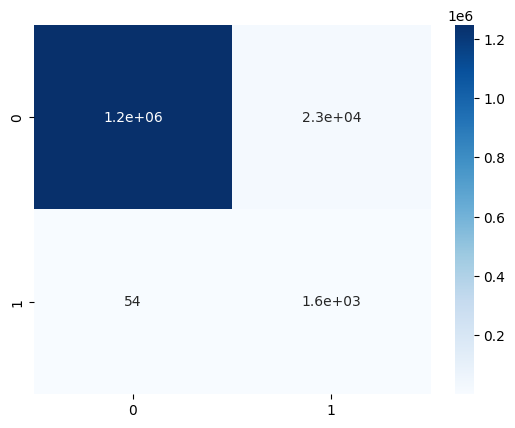

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()

In [39]:
X.head()

,step,amount,flag_balance_mismatch,amount_gt_old,deltaOrig,deltaDest,hour,net_balance_change,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_first_M
0,1,9839,0,0,9839,0,1,9839,0,0,1,0,1
1,1,1864,0,0,1864,0,1,1864,0,0,1,0,1
2,1,181,0,0,181,0,1,181,0,0,0,1,0
3,1,181,0,0,181,-21182,1,21363,1,0,0,0,0
4,1,11668,0,0,11668,0,1,11668,0,0,1,0,1


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['step', 'amount', 'deltaOrig', 'deltaDest', 'hour', 'net_balance_change']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: np.float64(0.5006462050159672), 1: np.float64(387.37412480974126)}

In [47]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classification output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

In [49]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [50]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=1024,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/30
3977/3977 - 21s - 5ms/step - auc: 0.9929 - loss: 0.0980 - precision: 0.0293 - recall: 0.9781 - val_auc: 0.9956 - val_loss: 0.0669 - val_precision: 0.0338 - val_recall: 0.9891
Epoch 2/30
3977/3977 - 13s - 3ms/step - auc: 0.9956 - loss: 0.0719 - precision: 0.0320 - recall: 0.9887 - val_auc: 0.9969 - val_loss: 0.0749 - val_precision: 0.0293 - val_recall: 0.9953
Epoch 3/30
3977/3977 - 21s - 5ms/step - auc: 0.9961 - loss: 0.0669 - precision: 0.0322 - recall: 0.9883 - val_auc: 0.9971 - val_loss: 0.0689 - val_precision: 0.0286 - val_recall: 0.9961
Epoch 4/30
3977/3977 - 19s - 5ms/step - auc: 0.9963 - loss: 0.0657 - precision: 0.0319 - recall: 0.9915 - val_auc: 0.9974 - val_loss: 0.0740 - val_precision: 0.0301 - val_recall: 0.9953
Epoch 5/30
3977/3977 - 16s - 4ms/step - auc: 0.9964 - loss: 0.0640 - precision: 0.0312 - recall: 0.9915 - val_auc: 0.9969 - val_loss: 0.0694 - val_precision: 0.0288 - val_recall: 0.9969
Epoch 6/30
3977/3977 - 18s - 4ms/step - auc: 0.9965 - loss: 0.0628 - p

In [51]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred_prob))

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 55s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270881
           1       0.03      0.99      0.07      1643

    accuracy                           0.96   1272524
   macro avg       0.52      0.98      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524

ROC-AUC score: 0.996853021742218


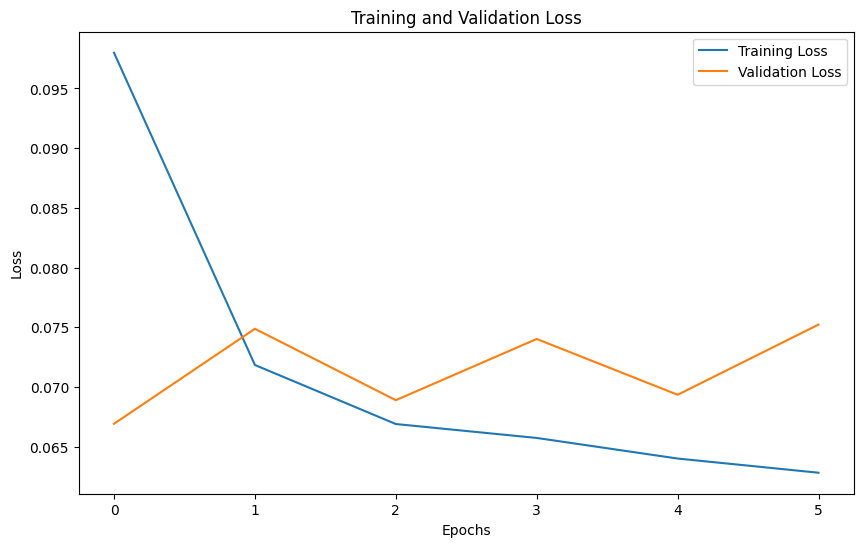

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

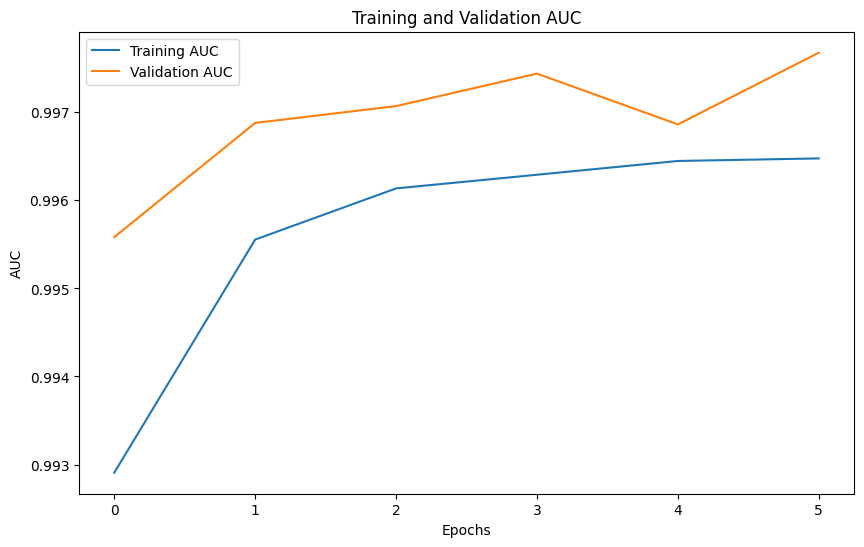

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('Training and Validation AUC')
plt.legend()
plt.show()

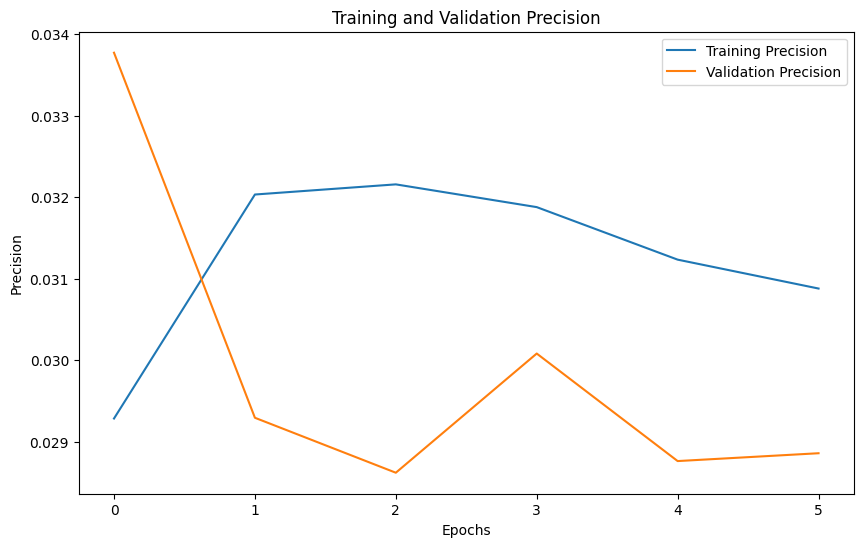

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.legend()
plt.show()

In [56]:
with open('ann.pkl', 'wb') as file:
    pickle.dump(model, file)

I have used Random Forest Clf, XgBoost Clf, lightGBM, Catboost and finally Artificial Neural Network.

1. `Random Forest` --> precision= 0.97 `**` recall= 0.79 `**` ROC-AUC Score= 95%

2. `XgBoost(RandomizedSearchCV)` --> recall = 0.97 `**` F1 score= 0.12 `**` ROC-AUC score = 0.97

3. `LightGBM` --> recall = 0.93 `**` F1 score = 0.12 `**` ROC-AUC score = 0.99

4. `Catboost` --> recall = 0.96 `**` F1 score = 0.25 `**` ROC-AUC score = 0.99

5. `ANN` ---> recall = 0.99 `**` F1 score = 0.02 `**` ROC-AUC score = 0.99